           Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
2024-12-31                -136800000.0                0.2     15392000000.0   
2023-12-31                         0.0               0.21     14796000000.0   
2022-12-31                 -14080000.0               0.08     17833000000.0   
2021-12-31                   2970000.0               0.11      9598000000.0   
2020-12-31                         NaN                NaN               NaN   

           Total Unusual Items Total Unusual Items Excluding Goodwill  \
2024-12-31        -684000000.0                           -684000000.0   
2023-12-31                 0.0                                    0.0   
2022-12-31        -176000000.0                           -176000000.0   
2021-12-31          27000000.0                             27000000.0   
2020-12-31                 NaN                                    NaN   

           Net Income From Continuing Operation Net Minority Interest  \
2024-12-31   

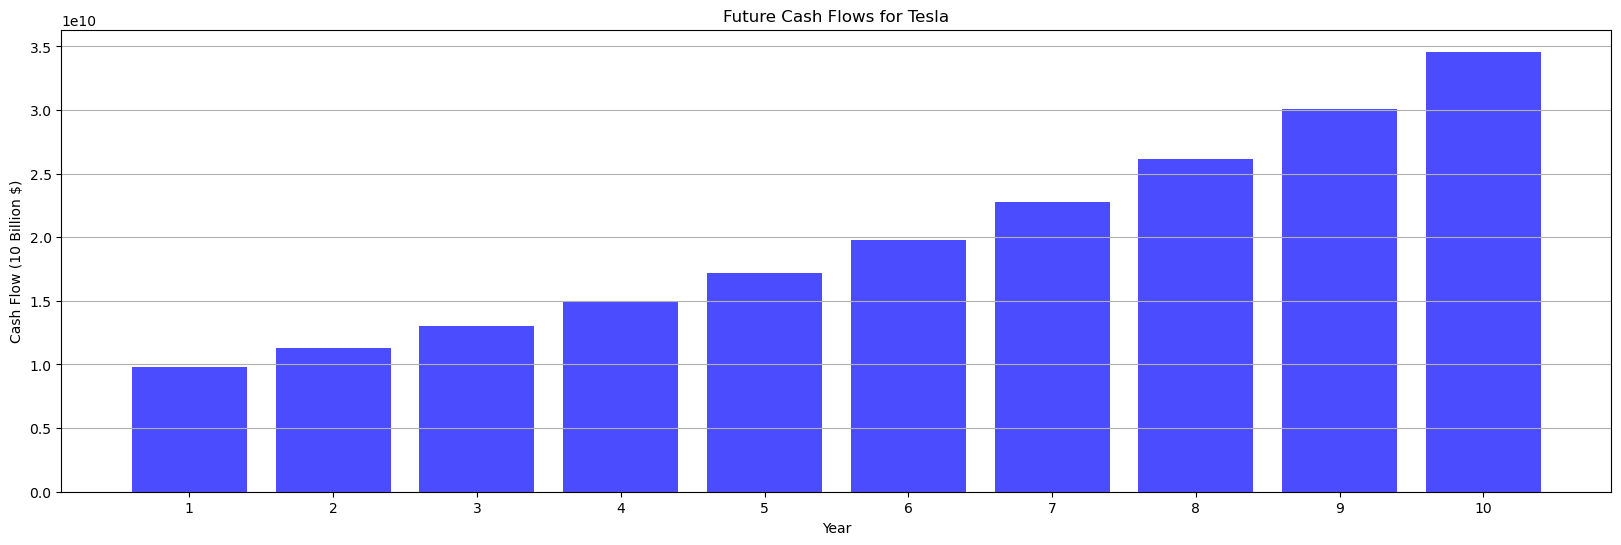

Present Value of Future Cash Flows: $346486788521.35
545314536551.80096


In [16]:
#DCF Model for Tesla

import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# Importing stock data from Yahoo Finance Library for Tesla stock prices, from 2010 to 2024
ticker = yf.Ticker('TSLA')
start_date = datetime(2010,1,1)
end_date = datetime(2024,1,1)

# Downloading the income statement data for Tesla
data = ticker.financials.T
print(data.head())

revenue_growth_rate = 0.15  # 15% annual revenue growth
ebit_margin = 0.15          # 15% EBIT margin
tax_rate = 0.15             # 15% tax rate
depreciation_pct = 0.06     # 6% of revenue
capex_pct = 0.08           # 8% of revenue
wc_change_pct = 0.02       # 2% of revenue
wacc = 0.09               # 9% discount rate
terminal_growth = 0.025   # 2.5% terminal growth

# Key financial metrics for Tesla
revenue = data['Total Revenue'].iloc[0]  # Latest total revenue

#Key formulas for DCF Model
ebit = revenue * ebit_margin
tax = ebit * tax_rate
depreciation = revenue * depreciation_pct
capex = revenue * capex_pct
wc_change = revenue * wc_change_pct
 

# Forecasting future cash flows
years = 10
future_cash_flows = []
for year in range(1, years + 1):
    revenue = data['Total Revenue'].iloc[0] * (1 + revenue_growth_rate) ** year
    ebit = revenue * ebit_margin
    tax = ebit * tax_rate
    depreciation = revenue * depreciation_pct
    capex = revenue * capex_pct
    wc_change = revenue * wc_change_pct
    
    free_cash_flow = ebit - tax + depreciation - capex - wc_change
    future_cash_flows.append(free_cash_flow)
# Calculating the present value of future cash flows
present_value = 0
for i, cash_flow in enumerate(future_cash_flows):
    present_value += cash_flow / ((1 + wacc) ** (i + 1))
# Calculating the terminal value
terminal_value = future_cash_flows[-1] * (1 + terminal_growth) / (wacc - terminal_growth)
# Adding the present value of the terminal value
present_value += terminal_value / ((1 + wacc) ** years)
# Calculating the intrinsic value per share
shares_outstanding = ticker.info['sharesOutstanding']
intrinsic_value = present_value / shares_outstanding
# Displaying the results
print(f"Intrinsic Value per Share: ${intrinsic_value:.2f}")
# Plotting the future cash flows
plt.figure(figsize=(20, 6))
plt.bar(range(1, years + 1), future_cash_flows, color='blue', alpha=0.7)
plt.title('Future Cash Flows for Tesla')
plt.xlabel('Year')
plt.ylabel('Cash Flow (10 Billion $)')
plt.xticks(range(1, years + 1))
plt.grid(axis='y')
plt.show()

print(f"Present Value of Future Cash Flows: ${present_value:.2f}")
print(terminal_value)